The primary objective of modeling the MNIST Fashion dataset in our project is to apply and gain a deeper understanding of deep learning techniques. 
By working with this dataset, which offers a diverse range of fashion items, we aim to delve into the intricacies of convolutional neural networks (CNNs). 
This project serves as a practical exploration of these techniques, allowing us to refine our skills in model architecture design, optimization, and fine-tuning.

## Data description

The Fashion MNIST dataset is a popular dataset used for machine learning and computer vision tasks. It serves as a drop-in replacement for the original MNIST dataset but offers more challenging and diverse classification tasks. 

Here are the key characteristics of the Fashion MNIST dataset:

-  **Fashion Categories:** Fashion MNIST contains grayscale images of various fashion items and accessories instead of handwritten digits. It includes a total of 10 fashion categories, making it a multi-class classification problem.

    The 10 categories in the dataset are:

    - T-shirt/top
    - Trouser
    - Pullover
    - Dress
    - Coat
    - Sandal
    - Shirt
    - Sneaker
    - Bag
    - Ankle boot
    
    
- **Image Size:** Each image in the Fashion MNIST dataset is 28 pixels in height and 28 pixels in width. Therefore, the images are 28x28 pixels in size, resulting in a total of 784 pixels per image.

- **Grayscale Images:** All images in the dataset are grayscale, which means they are represented in black and white without color information. Each pixel has a single intensity value, ranging from 0 (black) to 255 (white).

- **Dataset Size:** The dataset is split into two main parts: a training set and a test set.

- **Training Set:** It contains 60,000 images of fashion items, with 6,000 images per class.
Test Set: It contains 10,000 images, with 1,000 images per class.
Balanced Classes: The dataset is balanced, meaning that each fashion category has an approximately equal number of examples in both the training and test sets. This balance ensures that the model doesn't have a bias toward any specific class.

- **Use Cases:** Fashion MNIST is often used as a benchmark dataset for tasks such as image classification, deep learning model evaluation, and computer vision research. It provides a more challenging alternative to the classic MNIST dataset while maintaining a similar structure, making it a suitable choice for educational purposes and experimentation.

The Fashion MNIST dataset is commonly used by researchers and machine learning practitioners to test and compare the performance of various image classification algorithms and neural network architectures. It has become a standard dataset for practicing and prototyping in the field of computer vision due to its accessibility and similarity to real-world image recognition tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
data_train = pd.read_csv("fashion-mnist_train.csv")
data_test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see that the first column represents the labels, and the rest of the columns reprensents the 784 pixels of every image, so we are going to separate inputs from labels 

In [4]:
X = data_train.iloc[:,1:]
y = data_train.iloc[:,0]
X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
class_names = ['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
def plot_image(df, image_index=0, label=None, cmap='gray'):
    image_data = df.iloc[image_index,:].values
    image_data = image_data.reshape(28, 28)

    plt.figure(figsize=(1, 1))
    plt.imshow(image_data, cmap=cmap)
    if label:
        plt.title(label)
    plt.axis('off')
    plt.show()

Let's look at some of the images

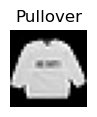

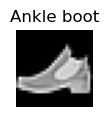

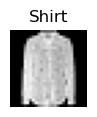

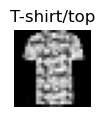

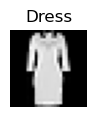

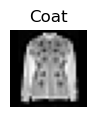

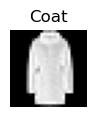

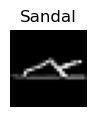

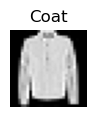

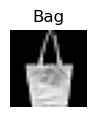

In [8]:
for index in range(0,10):
    plot_image(X, index, label=f"{class_names[y[index]]}")

Let's convert the data in the variable X to an array of 32-bit floating-point values (float32) to ensure that the pixel values are represented as decimal numbers.
Also we are going to normalize pixel values in order to standardize the input across different images and makes it easier for the models we are going to use to learn meaningful patterns.

In [9]:
X = X.astype('float32')
X_test = X_test.astype('float32')
X /= 255
X_test /= 255

Here we are reshaping X to convert each flat row of pixel values into a 4D tensor where each element represents a pixel in the image.

In [10]:
X = X.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [11]:
X.shape

(60000, 28, 28, 1)

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1 : Using simple ANN

We are going to try at first a simple ANN

In [14]:
# Simple ANN model
ann_model = models.Sequential()
ann_model.add(layers.Flatten(input_shape=(28,28,1)))
ann_model.add(layers.Dense(1000, activation='relu'))
ann_model.add(layers.Dense(500, activation='relu'))
ann_model.add(layers.Dense(10, activation='sigmoid'))

ann_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.7021 - accuracy: 0.7731 - val_loss: 0.5296 - val_accuracy: 0.8197
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4867 - accuracy: 0.8304 - val_loss: 0.4524 - val_accuracy: 0.8416
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4433 - accuracy: 0.8448 - val_loss: 0.4342 - val_accuracy: 0.8463
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4146 - accuracy: 0.8547 - val_loss: 0.4271 - val_accuracy: 0.8496
Epoch 5/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3951 - accuracy: 0.8613 - val_loss: 0.3890 - val_accuracy: 0.8621
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3793 - accuracy: 0.8666 - val_loss: 0.3831 - val_accuracy: 0.8640
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3655 - accuracy: 0.8708 - val_loss: 0.3739 -

In the next code, we are going to define a function to plot the training and validation loss and accuracy curves over epochs to visualize trends and potential issues (e.g., overfitting).

In [16]:
import matplotlib.pyplot as plt

def plotLossAndAccuracy(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(training_loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, label='Training Loss')
    plt.plot(epochs, validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_accuracy, label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

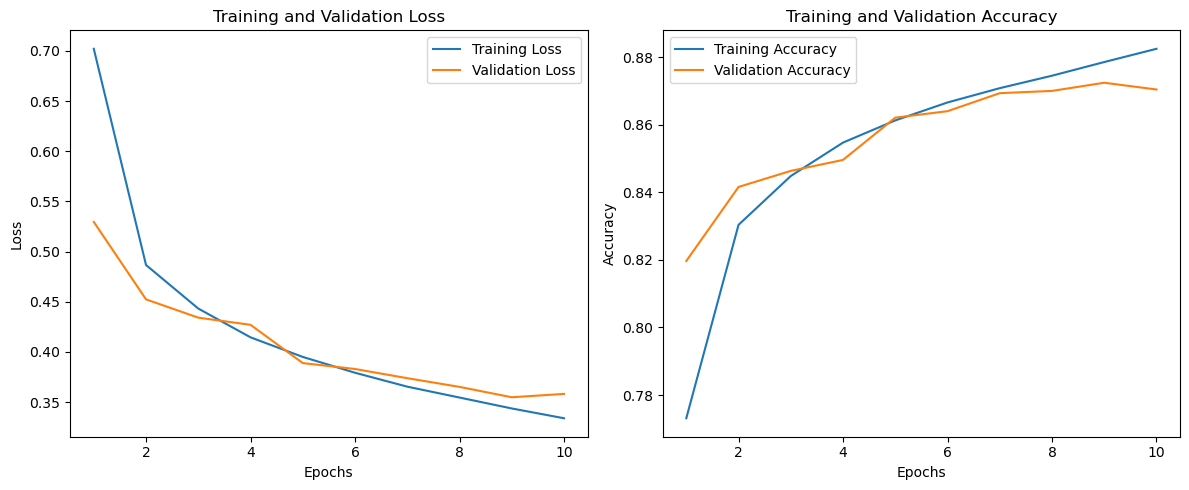

In [17]:
plotLossAndAccuracy(history)

**Analysis:**

In the first epoch, the model starts with relatively high loss and accuracy values.

As training progresses through more epochs, both training and validation losses decrease, and accuracy improves. This indicates that the model is learning from the training data and becoming better at making predictions. The decreasing training loss is a sign of convergence.

The validation accuracy is consistently improving, which is a positive sign.

We are seeing here that a simple ANN is doing a good job with an accuracy of 0.8825 in the 10th epoch.

Let's analyze the classification report and confusion matrix to gain a deeper understanding of the model.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [19]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.87      0.68      0.77      1000
           3       0.91      0.89      0.90      1000
           4       0.78      0.86      0.82      1000
           5       0.94      0.95      0.94      1000
           6       0.69      0.65      0.67      1000
           7       0.93      0.91      0.92      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



### **Analysis**

- Accuracy: The overall accuracy of the model is 87%, meaning it correctly predicted the class for 87% of the samples in the test dataset.
- Macro Avg: The macro-average F1-score is 0.87, indicating a balanced performance across all classes.
- Weighted Avg: The weighted average F1-score is 0.87, which takes class imbalance into account. It suggests the model performs equally well on each class, considering the class distribution in the test dataset.

The classes 1, 3, 5, 7, 8, 9 have high precision, recall, and F1-scores, indicating the model is performing well in identifying these classes.
The classes 0, 2, 4, 6 have lower precision, recall, and F1-scores, suggesting room for improvement in the model's performance for these classes.

For example, the model is accurate approximately 62% of the time predicting a shirt. This suggests that there are relatively few instances where the model incorrectly identifies other items as shirts. 
On the other hand, the recall of 0,79 indicates that the model captures only about 739% of the actual shirts present in the dataset. In other words, it misses a significant portion of shirts, leading to false negatives. 

We are going to plot the confusion matrix in order to investigate misclassified samples in these classes to understand the model's mistakes better.


**Analysis**

The heatmap above indicates that shirts (class 6) are frequently misclassified as T-shirts/tops (class 0) and Pullovers (class 2). This is understandable given the visual similarities between these classes. To address these challenges, a more sophisticated and nuanced model may be necessary.

In summary, the model shows decent overall performance, but there is room for improvement, especially for specific classes.
To address this, we will explore the implementation of a CNN featuring two convolution layers combined with max-pooling techniques.

## Model 2 : Using CNN

In [21]:
# Define the CNN model
cnn_model = models.Sequential()

# Convolutional and Pooling Layers
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
cnn_model.add(layers.Flatten())

# Fully Connected Layers
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for MNIST digits

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [22]:
history = cnn_model.fit(X_train, y_train,
                        batch_size=32,
                        epochs=10,
                        validation_data=(X_valid, y_valid),
                        shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.4882 - accuracy: 0.8229 - val_loss: 0.3629 - val_accuracy: 0.8663
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3275 - accuracy: 0.8803 - val_loss: 0.3162 - val_accuracy: 0.8832
Epoch 3/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2811 - accuracy: 0.8972 - val_loss: 0.2808 - val_accuracy: 0.8987
Epoch 4/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.2475 - accuracy: 0.9096 - val_loss: 0.2788 - val_accuracy: 0.8963
Epoch 5/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.2188 - accuracy: 0.9190 - val_loss: 0.3033 - val_accuracy: 0.8939
Epoch 6/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1980 - accuracy: 0.9269 - val_loss: 0.2585 - val_accuracy: 0.9079
Epoch 7/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.1788 - accuracy: 0.9335 - val_loss: 0.2734 -

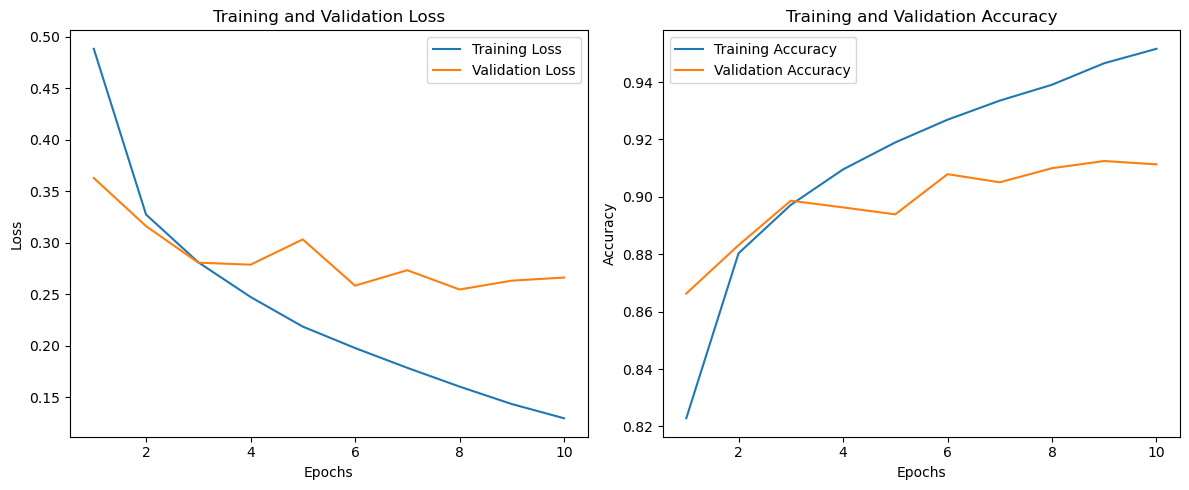

In [23]:
plotLossAndAccuracy(history)

Based on the plots above we can see that the model is starting to overfit the data, especially in the later epochs (Epoch 7 and beyond), as evidenced by the increase in validation loss and fluctuations in validation accuracy.
Also, we can see a divergence between training and validation accuracy, which indicates that the model has started to memorize the training data (overfit) rather than learning the underlying patterns.

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = cnn_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.98      0.99      0.98      1000
           2       0.85      0.88      0.86      1000
           3       0.92      0.93      0.92      1000
           4       0.89      0.86      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.77      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Next, we'll use dropout to make the model more stable and check if it leads to better results.

## Model 3 : Using CNN with dropout

In [25]:
# Define the CNN model
cnn_with_dropout_model = models.Sequential()

# Convolutional and Pooling Layers
cnn_with_dropout_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_with_dropout_model.add(layers.MaxPooling2D((2, 2)))
cnn_with_dropout_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_with_dropout_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
cnn_with_dropout_model.add(layers.Flatten())

# Fully Connected Layers
cnn_with_dropout_model.add(layers.Dense(64, activation='relu'))
cnn_with_dropout_model.add(layers.Dropout(0.5))
cnn_with_dropout_model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for MNIST digits

# Compile the model
cnn_with_dropout_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
cnn_with_dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [26]:
history = cnn_with_dropout_model.fit(X_train, y_train,
                                     batch_size=32,
                                     epochs=10,
                                     validation_data=(X_valid, y_valid),
                                     shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.7104 - accuracy: 0.7410 - val_loss: 0.4277 - val_accuracy: 0.8398
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.4980 - accuracy: 0.8164 - val_loss: 0.3709 - val_accuracy: 0.8577
Epoch 3/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.4375 - accuracy: 0.8432 - val_loss: 0.3265 - val_accuracy: 0.8827
Epoch 4/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.3915 - accuracy: 0.8585 - val_loss: 0.3023 - val_accuracy: 0.8913
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3669 - accuracy: 0.8680 - val_loss: 0.2896 - val_accuracy: 0.8927
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3389 - accuracy: 0.8769 - val_loss: 0.2735 - val_accuracy: 0.8992
Epoch 7/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.3193 - accuracy: 0.8850 - val_loss: 0.2793 -

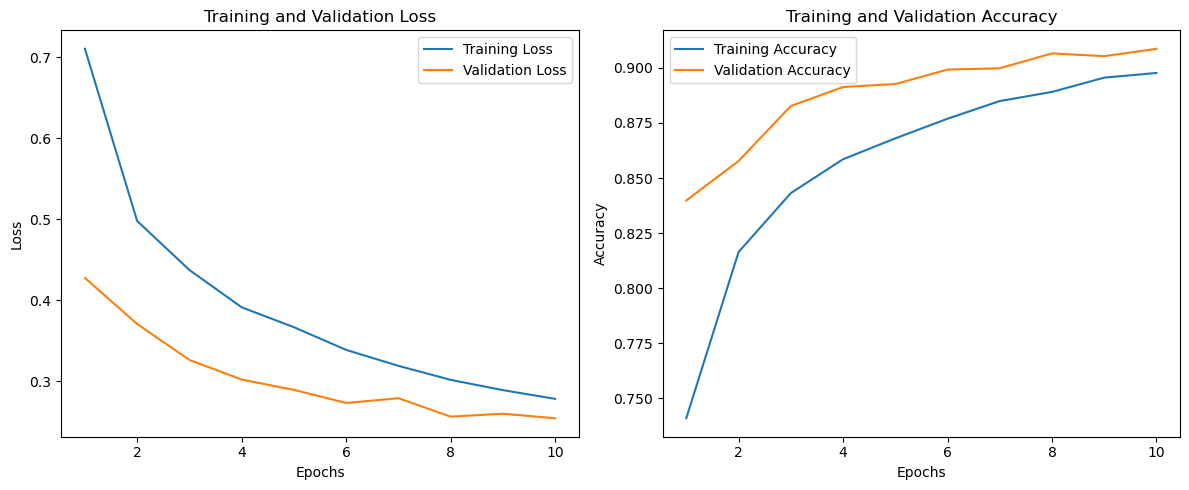

In [27]:
plotLossAndAccuracy(history)

Over the course of 10 epochs, the model's loss consistently decreases, and its accuracy on the training data steadily increases, indicating that it is learning to fit the training data better. Additionally, the validation loss and accuracy metrics show a similar trend, with the model generalizing well to unseen data. By the end of training, the model achieves an accuracy of approximately 90.87% on the validation set, which is quite high and suggests that it can make accurate predictions on new, previously unseen data. However, the model's performance should also be evaluated on other relevant metrics, and further testing on a diverse range of data should be conducted to ensure its robustness and reliability in real-world applications.

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

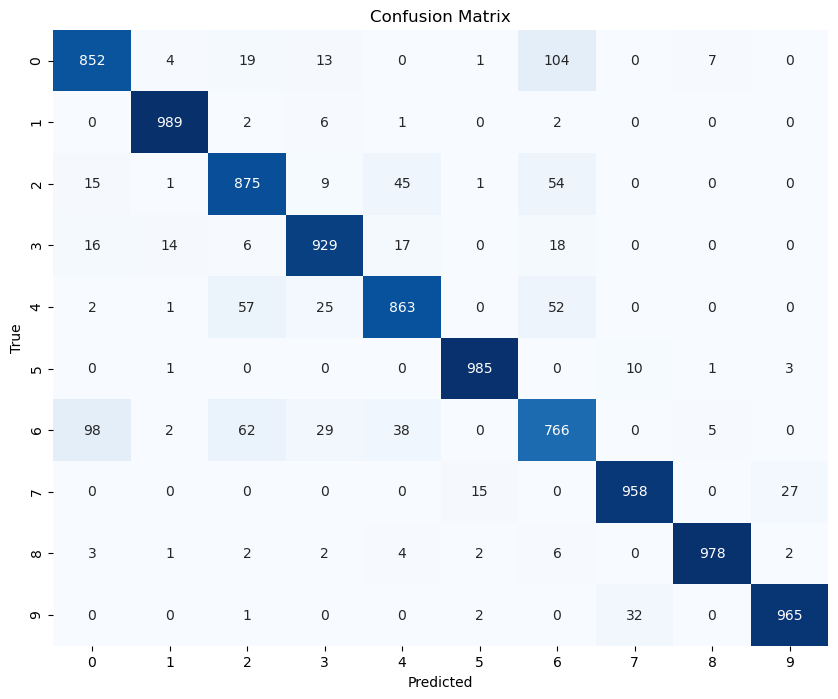

In [29]:
plot_heatmap(y_test, y_pred_classes)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = cnn_with_dropout_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.84      0.87      1000
           3       0.93      0.93      0.93      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.70      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



This model generally outperforms the ANN model in terms of precision, recall, and F1-score for most individual classes as well as in terms of overall accuracy, macro average, and weighted average metrics.
This model has a higher overall accuracy indicating better overall performance.

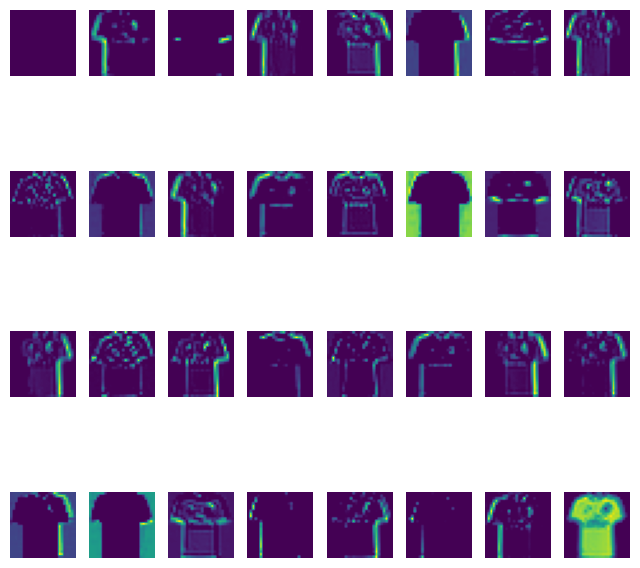

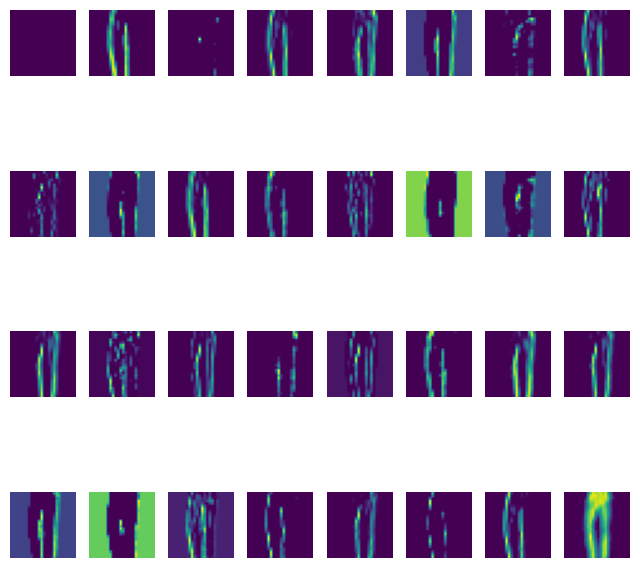

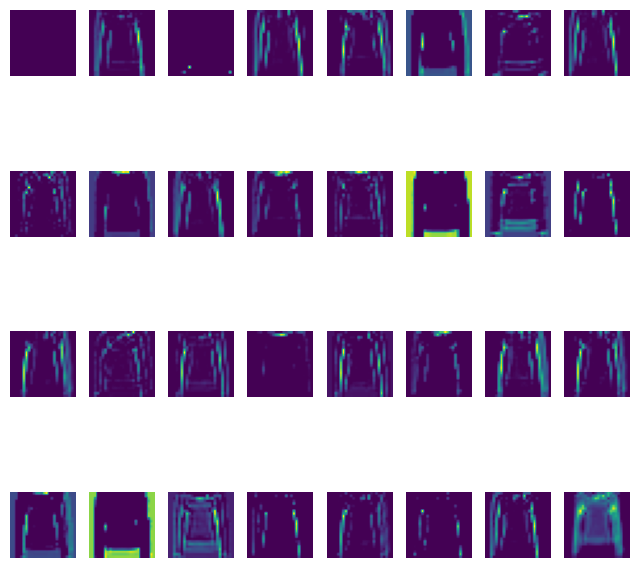

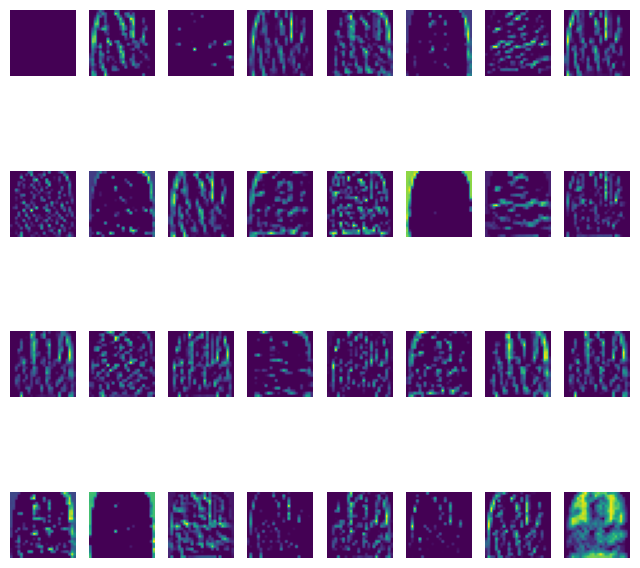

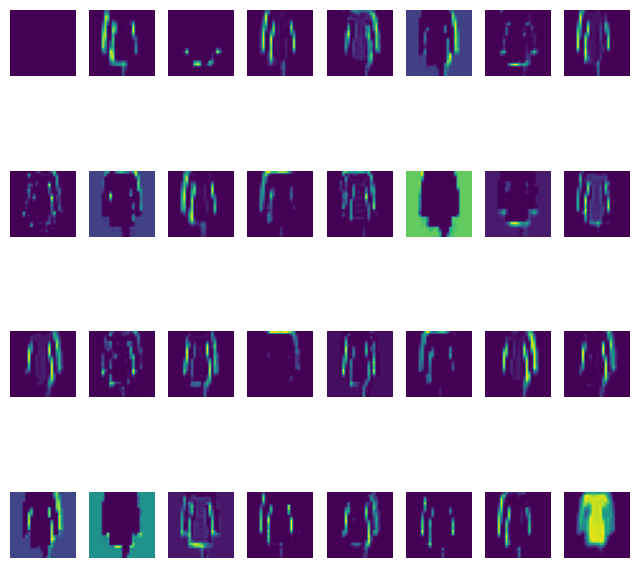

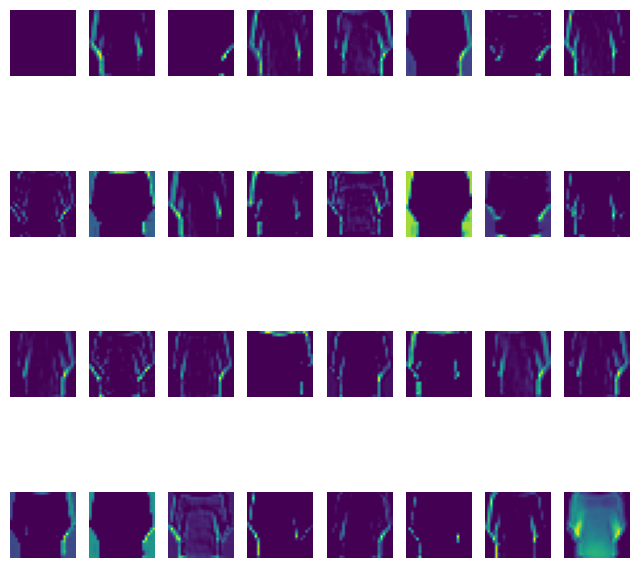

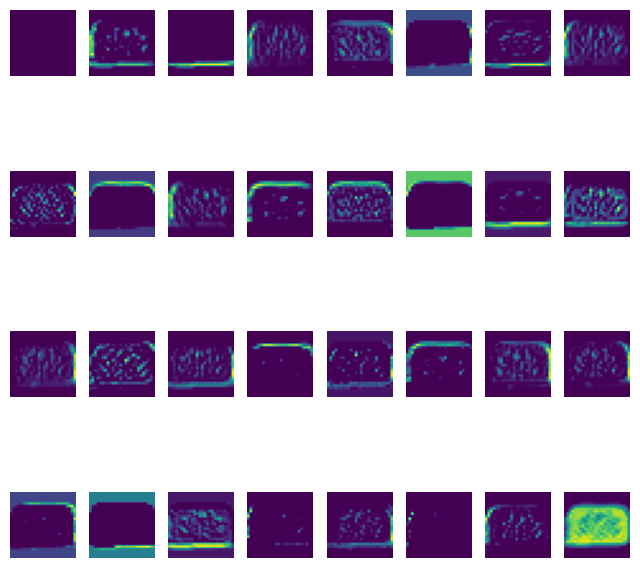

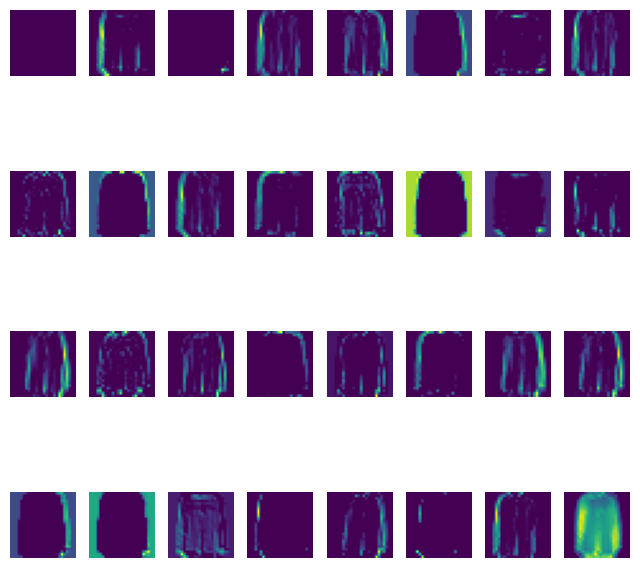

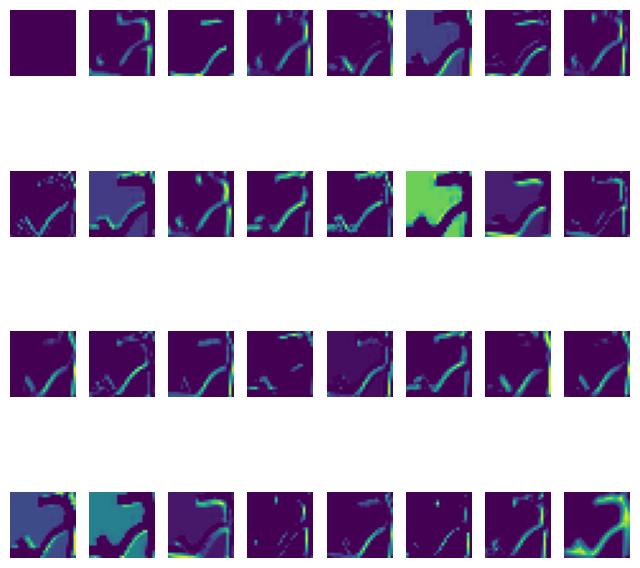

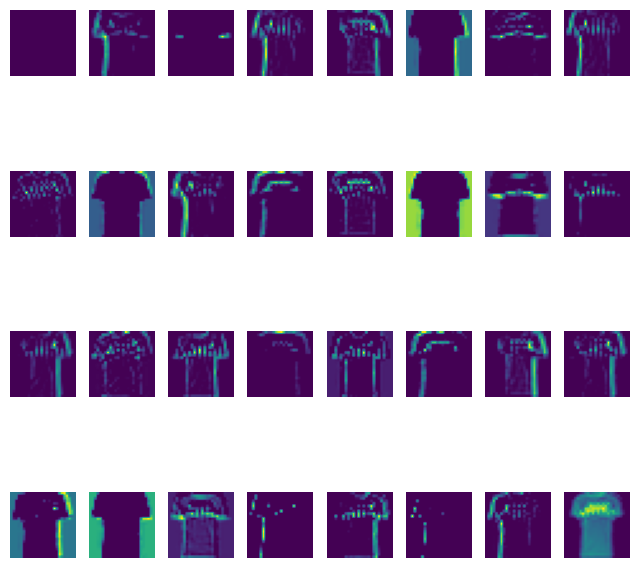

In [31]:
from tensorflow.keras.models import Model
chosen_layer = cnn_with_dropout_model.get_layer(name='conv2d_2')
activation_model = Model(inputs=cnn_with_dropout_model.input, outputs=chosen_layer.output)

# Compile the activation model
activation_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Make predictions on your dataset to get activations
activations = activation_model.predict(X_test) 

for i in range(10):
    plt.figure(figsize=(8, 8))
    for j in range(32):  # Assuming you have 32 filters in the layer
        plt.subplot(4, 8, j + 1)
        plt.imshow(activations[i, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.show()

## Conclusion

In the evaluation of our models, it is evident that the model incorporating dropout layers **(Model 3)** consistently demonstrates the best performance across various metrics. This model exhibits a substantial improvement in accuracy, achieving a validation accuracy of approximately 90.71% at the end of the training process. This success underscores the significance of dropout regularization in preventing overfitting, enabling the model to generalize well to unseen data.

However, it's important to note that there is still room for further enhancements. To push the model's performance even higher, we can explore several avenues: 
- Firstly, fine-tuning hyperparameters such as the dropout rate and learning rate could lead to incremental improvements. 
- Secondly, architectural modifications, such as increasing the depth of the network or experimenting with different convolutional layer configurations, can be investigated. 
- Additionally, leveraging techniques like data augmentation to increase the diversity of training data, implementing learning rate schedules, or exploring more advanced architectures such as residual networks (ResNet) may also contribute to refining our model further. By systematically exploring these strategies and iteratively fine-tuning our model, we can aim for even better results while maintaining the invaluable benefits of dropout regularization.